<a href="https://colab.research.google.com/github/yohanesnuwara/DASLab/blob/main/notebooks/DASAutopick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This purpose of this notebook is to demonstrate the use of AIC, kurtosis, STA/LTA, and STFT for automated detection and picking of events from a raw DAS record. 

## Set up

In [ ]:
# Install libraries in Colab
!pip install -q obspy
# !pip install -q utm
!pip install -q nptdms==0.25.0 # Older version

# Import routine libraries
# import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.ticker as tick
# from scipy import signal, stats
# import pandas as pd

# Plot formatting
plt.rcParams["font.size"] = 20
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

from nptdms import TdmsFile
# import utm

     |████████████████████████████████| 24.7MB 115kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 153kB 6.6MB/s 


In [ ]:
# Access DASLab repository
!git clone 'https://github.com/yohanesnuwara/DASLab'

import sys
sys.path.append('/content/DASLab')

from input_output import *
from TDMS_Functions import *
from signalprocessing import *
from autopick import *
from dasplot import *

Cloning into 'DASLab'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (277/277), done.
remote: Compressing objects: 100% (272/272), done.
remote: Total 277 (delta 157), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (277/277), 11.09 MiB | 8.42 MiB/s, done.
Resolving deltas: 100% (157/157), done.


In [ ]:
# Connect to Goo Drive to access data
from google.colab import drive
drive.mount('/content/drive') # yohannesnuwara@gmail.com


Mounted at /content/drive


## Load data from TDMS

While loading data, pay attention to important parameters that we will use frequently later, e.g. sampling intervals and channel intervals

In [ ]:
# Fiber distance from the interogator
stc500 = (3243, 3746)
hwc500 = (1016, 1584)
stc250 = (3243, 3494)
hwc250 = (1016, 1299)
bc880 = (3938, 4690)
stcSurf = (2800, 3243)
hwcSurf = (525, 1016)
welma = (2916, 3615)

tap = Model()
tap.hwc = [524, 554, 582, 590, 603, 625, 649, 675, 703, 722, 744, 773, 801, 
           822, 844, 867, 890, 933, 963, 1016]
tap.stc = [2811 ,2835, 2860, 2868, 2877, 2900, 2921, 2942, 2967, 2985, 3005, 
           3030, 3053, 3073, 3093, 3112, 3135, 3172, 3193, 3936]

# Site information
ichihara = Events()
ichihara.loc = (35.511241, 140.192608)
# ichihara.loc = (35.511250, 140.192500)
ichihara.dep = 0.0
a, b, c, d = utm.from_latlon(ichihara.loc[0], ichihara.loc[1])
ichihara.utmE = a / 1000
ichihara.utmN = b / 1000   

In [ ]:
file1 = "/content/drive/MyDrive/RITE_Yohanes/20210209/data/connected whole_UTC_20200220_035300.000.tdms"
file2 = "/content/drive/MyDrive/RITE_Yohanes/20210209/data/connected whole_UTC_20200220_063300.000.tdms"
file3 = "/content/drive/MyDrive/RITE_Yohanes/20210209/data/connected whole_UTC_20200221_223200.000.tdms"
file4 = "/content/drive/MyDrive/RITE_Yohanes/20210209/data/connected whole_UTC_20200226_132300.000.tdms"
file5 = "/content/drive/MyDrive/RITE_Yohanes/20210209/data/connected whole_UTC_20200226_132400.000.tdms"
file6 = "/content/drive/MyDrive/RITE_Yohanes/20210209/data/connected whole_UTC_20200228_183800.000.tdms"
file7 = "/content/drive/MyDrive/RITE_Yohanes/20210209/data/connected whole_UTC_20200229_222200.000.tdms"
file8 = "/content/drive/MyDrive/RITE_Yohanes/20210209/data/connected whole_UTC_20200303_085400.000.tdms"

In [ ]:
# Working directory
fileorigin = file1

# Processing spatial information
DRSurf = (stcSurf[1] - stcSurf[0]) / (hwcSurf[1] - hwcSurf[0])
DRWell = (stc250[1] - stc250[0])/(hwc250[1] - hwc250[0])

# Parameters
ar_denoise = (-50, -20) # -90,-20
order = 5
hicut, locut = 40, 2 # 80,2
# hicut, locut = 35, 25
nsamples = 4000
nchannels = 3840
depthinit, denoiseflg, bpfflg, tdmschange = True, True, True, False

sliceflg = {'bc880': True, 'hwc250': True,'stc250': True, 
            'stcSurf': True,'hwcSurf': True, 'welma': False}
slicevalue = {'bc880': bc880,'hwc250': hwc250,'stc250': stc250,
              'stcSurf': stcSurf, 'hwcSurf': hwcSurf,'welma': welma}  

# Processing data
event = load_data_with_filter(fileorigin, ar_denoise=ar_denoise, order=order,
                              hicut=hicut,locut=locut, depthinit=depthinit,
                              denoiseflg=denoiseflg, bpfflg=bpfflg,
                              sliceflg=sliceflg, slicevalue=slicevalue,
                              fileformat='tdms',temptdms='/content/processing',
                              tdmschange=tdmschange, nsamples=nsamples,
                              nchannels=nchannels)

fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(1,1,1)
event.entire.view_sparse_as(ax,subsampling=10,color='seismic',myabs=1000)

plt.show()

NameError: ignored

Sampling interval from above is 0.001 s and channel interval is 1.020 m. Therefore sampling frequency or rate is 1,000 (1/s). In any case, we want to change the channel interval for instance, we can make a new TDMS object, like given:

In [ ]:
### OPTIONAL if we want to change channel interval information
chan_int = 1.019 # New channel interval
ts = 0.001 # Sampling interval
das = event.stc250

chan_num = len(das.zz) # Number of channels
new_zz = np.cumsum(np.full(chan_num-1, chan_int))
new_zz = np.append(0, new_zz)

# Make TDMS object
das_stc = TDMSEvent(das.data, das.tt, new_zz)

das_stc

In [ ]:
# import pickle

# def savePkl(data, filename):
#   with open(filename, 'wb') as f:
#     pickle.dump(data, f)

# combined = np.hstack((event.stc250.data, event.hwc250.data, event.bc880.data))
# savePkl(combined, 'file8.pkl')

In [ ]:
# !cp "/content/file8.pkl" "/content/drive/MyDrive/RITE_Yohanes/Pickles"

## Load Pickles

TDMS files have been converted to Pickles for easy loading. To see how the conversion is done, see "DASPickles" notebook. 

In [ ]:
# Takes 1 minute to load all 8 files from pickle. Takes nearly half the Colab RAM.
dir = "/content/drive/MyDrive/RITE_Yohanes/Pickles/"
n_events = 8 # Number of events to load

stc, hwc, bc = [], [], []
for i in range(n_events):
  filename = dir+'file'+'{}'.format(i+1)+'.pkl'
  f = loadPkl(filename)
  stc.append(f[:,:246])
  hwc.append(f[:,246:246+277])
  bc.append(f[:,246+277:246+277+737])

In [ ]:
# Convert to Numpy array
bc = np.array(bc)
hwc = np.array(hwc)
stc = np.array(stc)

Select one event. 

In [ ]:
das = bc # Specify stc, hwc, or bc
no_event = 1 # Event number

data = das[no_event-1,::]
data

array([[-152., -171., -188., ...,  -53.,  -63.,  -81.],
       [  19.,  -37.,  -25., ...,   29.,   48.,  103.],
       [ 130.,  124.,   43., ...,   12.,   19.,  -71.],
       ..., 
       [ -76.,   10.,  -87., ..., -170., -164., -118.],
       [-254., -254.,  -56., ...,   -5.,   40.,   89.],
       [-221., -234.,  -82., ...,  -58.,  -70., -161.]])

## Plot waveform

Because we load from Pickles (not from TDMS), we need to specify the geometry (channel interval). We will produce sets of values of channel depths and time samples. 

Plot STC

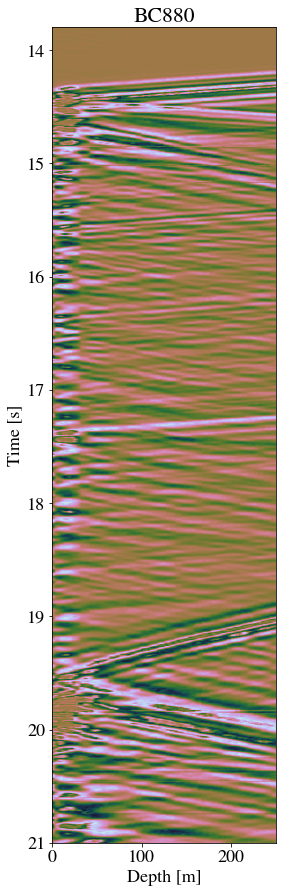

In [ ]:
# Specify stc/hwc/bc, and its time and depth intervals
no_event = 1
das = bc
dt = .001
dz = 1.0295

# Data
data = das[no_event-1,::]

# Dimension
nt, nz = data.shape

# Time and depth samples
t = np.arange(0,nt*dt,dt)
z = np.arange(0,nz*dz,dz)

# Plot
plt.figure(figsize=(4,15))
plt.imshow(data, aspect='auto', extent=(min(z), max(z), max(t), min(t)),
            cmap='cubehelix')
# plt.colorbar()
plt.title('BC880')
plt.xlabel('Depth [m]')
plt.ylabel('Time [s]')
plt.ylim(21,13.8)
# plt.ylim(35,28)
plt.xlim(0,250)
plt.show()

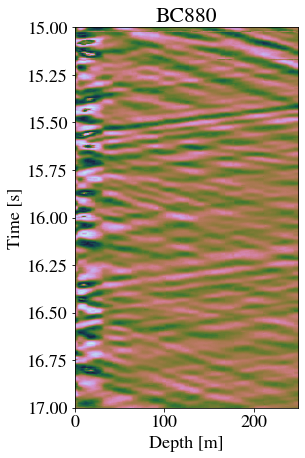

In [ ]:
# Specify stc/hwc/bc, and its time and depth intervals
no_event = 1
das = bc
dt = .001
dz = 1.0295

# Data
data = das[no_event-1,::]

# Dimension
nt, nz = data.shape

# Time and depth samples
t = np.arange(0,nt*dt,dt)
z = np.arange(0,nz*dz,dz)

# Plot
plt.figure(figsize=(4,7))
plt.imshow(data, aspect='auto', extent=(min(z), max(z), max(t), min(t)),
            cmap='cubehelix')
# plt.colorbar()
plt.title('BC880')
plt.xlabel('Depth [m]')
plt.ylabel('Time [s]')
# plt.ylim(21,13.8)
plt.ylim(17, 15)
plt.xlim(0,250)
plt.show()

Plot HWC

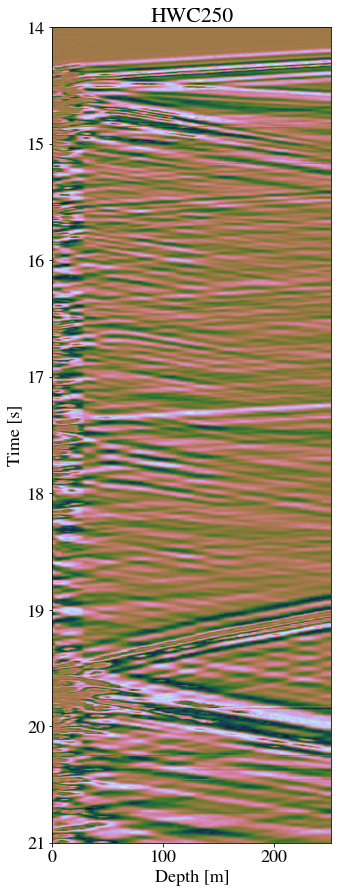

In [ ]:
# Specify stc/hwc/bc, and its time and depth intervals
no_event = 1
das = stc
dt = .001
dz = 1.0295

# Data
data = das[no_event-1,::]

# Dimension
nt, nz = data.shape

# Time and depth samples
t = np.arange(0,nt*dt,dt)
z = np.arange(0,nz*dz,dz)

data = normalize(data)

# Plot
plt.figure(figsize=(5,15))
plt.imshow(data, aspect='auto', extent=(min(z), max(z), max(t), min(t)),
            cmap='cubehelix')
# plt.colorbar()
plt.title('HWC250')
plt.xlabel('Depth [m]')
plt.ylabel('Time [s]')
plt.ylim(21,14)
plt.show()

Plot BC

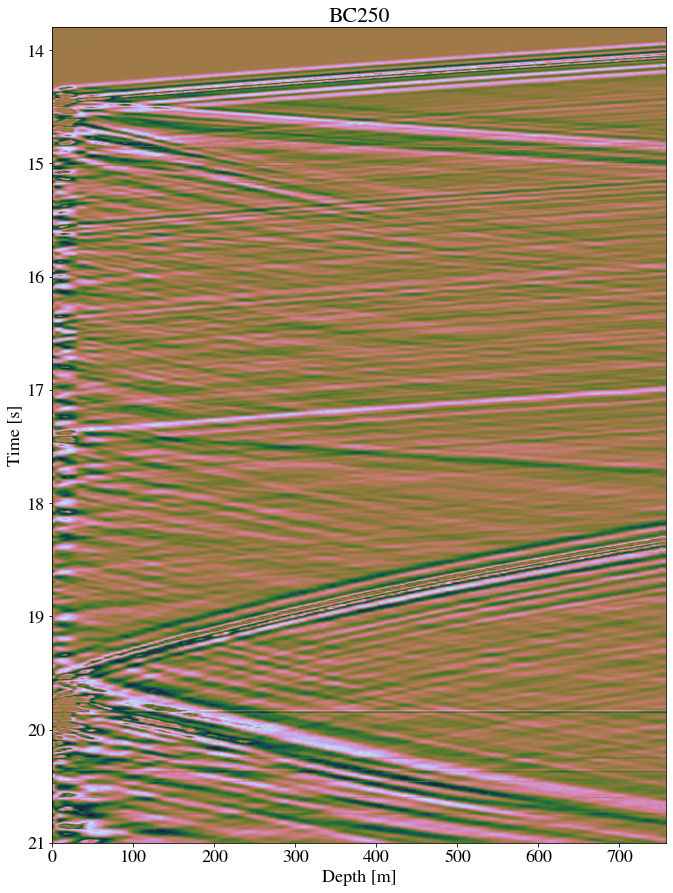

In [ ]:
# Specify stc/hwc/bc, and its time and depth intervals
no_event = 1
das = bc
dt = .001
dz = 1.0295

# Data
data = das[no_event-1,::]

# Dimension
nt, nz = data.shape

# Time and depth samples
t = np.arange(0,nt*dt,dt)
z = np.arange(0,nz*dz,dz)

# Plot
plt.figure(figsize=(11,15))
plt.imshow(data, aspect='auto', extent=(min(z), max(z), max(t), min(t)),
            cmap='cubehelix')
plt.title('BC250')
plt.xlabel('Depth [m]')
plt.ylabel('Time [s]')
plt.ylim(21,13.8)
plt.show()

In [ ]:
# das_list = [event.stc250, event.hwc250, event.bc880]
# titles = ['STC250', 'HWC250', 'BC880']
# height = [4, 5, 11]

# for i in range(len(das_list)):
#   plt.figure(figsize=(height[i],15))
#   plt.imshow(das_list[i].data, aspect='auto', 
#              extent=(min(das_list[i].zz), max(das_list[i].zz), 
#                      max(das_list[i].tt), min(das_list[i].tt)),
#              cmap='cubehelix')
#   plt.title(titles[i])
#   plt.xlabel('Depth [m]')
#   plt.ylabel('Time [s]')
#   plt.ylim(21,13.8)
#   plt.show()

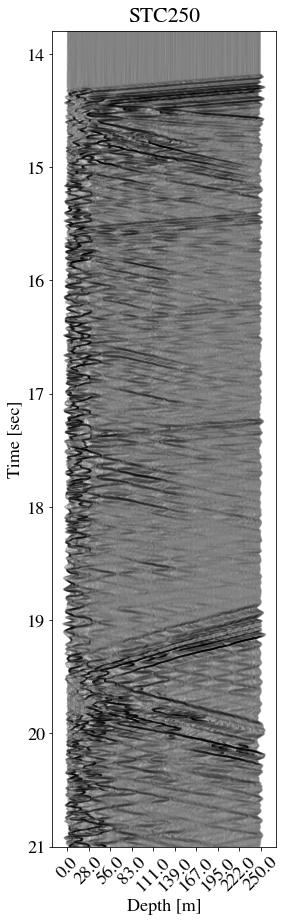

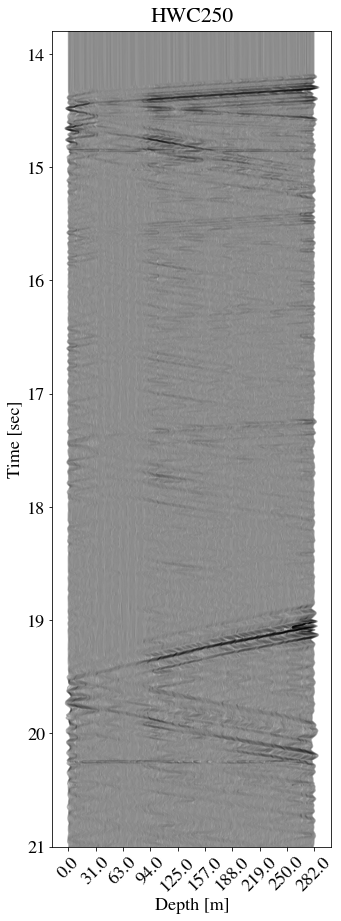

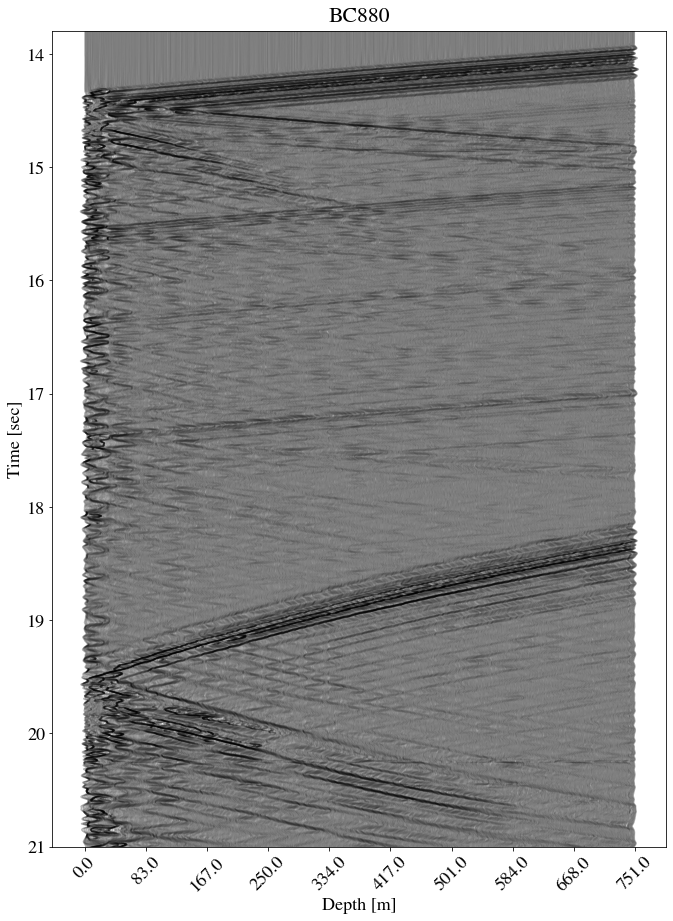

In [ ]:
# Plot STC, HWC, BC altogether
das_list = [event.stc250, event.hwc250, event.bc880]
titles = ['STC250', 'HWC250', 'BC880']
height = [4, 5, 11]

for i in range(len(das_list)):
  # plotWaveformTraces(das_list[i], magnify=1e3, xlim=(13.8,21), alpha=0.1, 
  #                    title=titles[i], figsize=(15,height[i]))
  plotVSP(das_list[i], magnify=3e3, ylim=(13.8,21), alpha=0.3, 
          title=titles[i], figsize=(height[i],15))  
  plt.show()

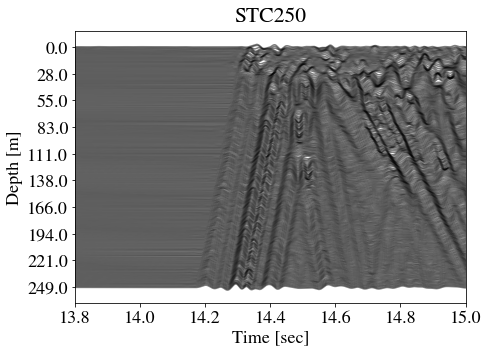

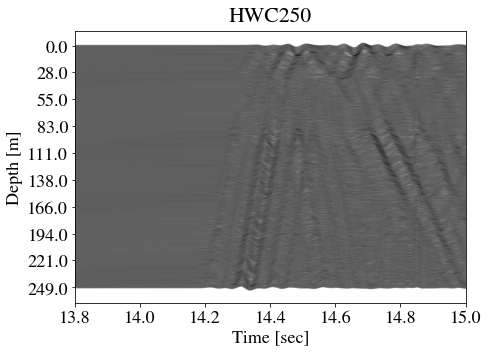

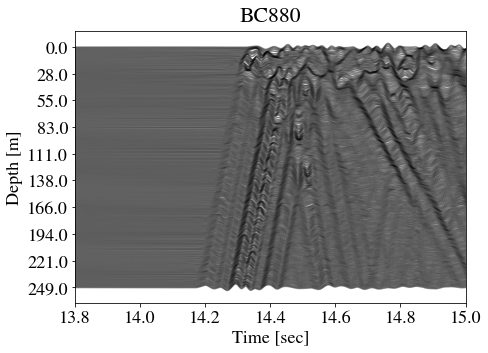

In [ ]:
# Plot STC, HWC, BC altogether
das_list = [event.stc250, event.hwc250, event.bc880]
titles = ['STC250', 'HWC250', 'BC880']

for i in range(len(das_list)):
  plotWaveformTraces(das_list[i], magnify=5e3, xlim=(13.8,15), ylim=(0,250), alpha=0.5, 
                     title=titles[i])
  plt.show()

Apply filters.

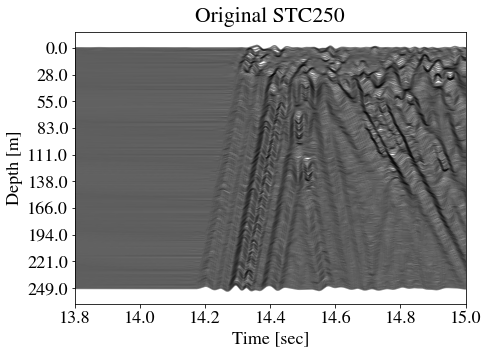

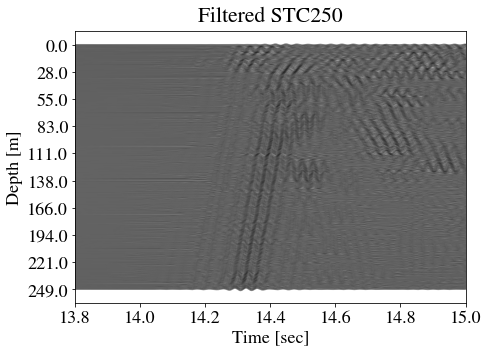

In [ ]:
das = event.stc250

data = das.data
nt, nz = data.shape

# Filter, then convert result to TDMS object
filt = [butter_bandpass_filter(data[:,i], 25, 35, fs=1/0.001) for i in range(nz)]
das_filt = TDMSEvent(np.transpose(filt), das.tt, das.zz)

# Plot waveform
plotWaveformTraces(das, magnify=5e3, xlim=(13.8,15), ylim=(0,250), alpha=0.5, 
                    title='Original STC250')
plt.show()

plotWaveformTraces(das_filt, magnify=5e3, xlim=(13.8,15), ylim=(0,250), alpha=0.5, 
                    title='Filtered STC250')
plt.show()

## Plot single channel and identify event

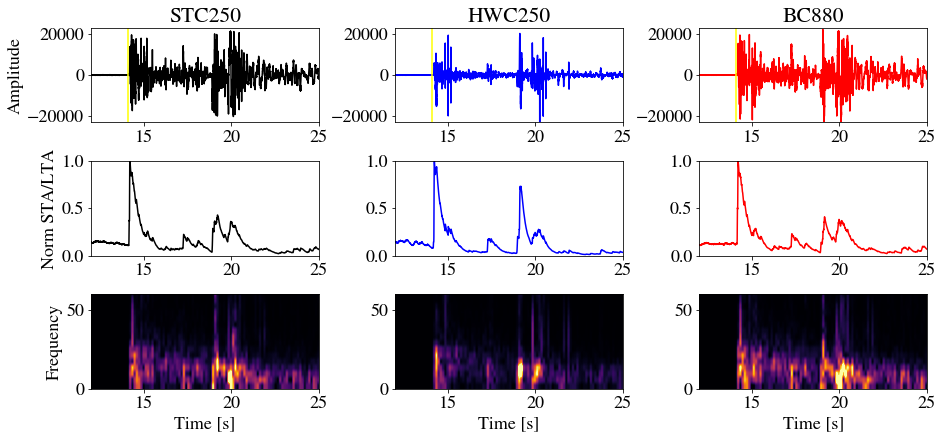

In [ ]:
no_event = 1
no_chann = 220
das_list = [stc, hwc, bc]
titles = ['STC250', 'HWC250', 'BC880']
color = ['black', 'blue', 'red']

# Time and depth samples
t = np.arange(0,nt*dt,dt)
# z = np.arange(0,nz*dz,dz)

plt.figure(figsize=(13,6))
for i in range(len(das_list)):
  y = (das_list[i])[no_event-1,:,no_chann-1]

  # Calculate STA/LTA
  sl = STA_LTA(y)
  sl = normalize1D(sl)

  # STFT
  f, tt, Zxx = stftSpectrogram(y, fs=1/dt, plot=False)
  Zxx = np.abs(Zxx)
  Zxx = normalize(Zxx)  

  # Plot trace
  plt.subplot(3,3,i+1)
  plt.plot(t, y, color=color[i])
  plt.axvline(14.1, color='yellow')
  plt.xlim(12,25)
  plt.ylim(-2.3e4, 2.3e4)
  plt.title(titles[i])
  if i==0:
    plt.ylabel('Amplitude')

  # Plot STA/LTA
  plt.subplot(3,3,i+4)
  plt.plot(t, sl, color=color[i])
  if i==0:
    plt.ylabel('Norm STA/LTA')
  plt.xlim(12,25)    
  plt.ylim(0,1)

  # Plot STFT
  plt.subplot(3,3,i+7)
  plt.imshow(Zxx, aspect='auto', extent=(min(t), max(t), min(f), max(f)), 
             cmap='inferno', origin='lower', vmax=.6)
  plt.xlabel('Time [s]')
  if i==0:
    plt.ylabel('Frequency')
  plt.xlim(12,25)    
  plt.ylim(0,60)

plt.tight_layout(0.2)

In [ ]:
from IPython.display import Audio

no_event = 1
no_chann = 200
y = stc[no_event-1,:,no_chann-1] * 20000

Audio(y, rate=2000)

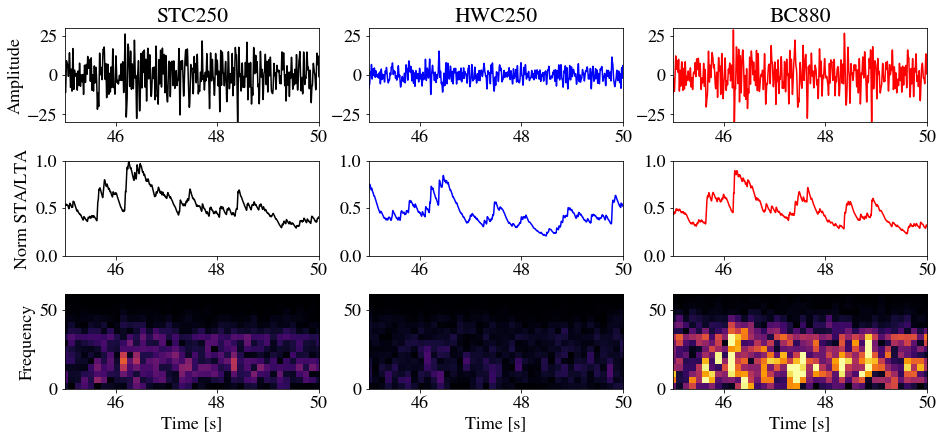

In [ ]:
no_event = 3
no_chann = 220
das_list = [stc, hwc, bc]
titles = ['STC250', 'HWC250', 'BC880']
color = ['black', 'blue', 'red']

# Time and depth samples
t = np.arange(0,nt*dt,dt)
# z = np.arange(0,nz*dz,dz)

plt.figure(figsize=(13,6))
for i in range(len(das_list)):
  y = (das_list[i])[no_event-1,:,no_chann-1]

  # Calculate STA/LTA
  sl = STA_LTA(y)
  sl = normalize1D(sl)

  # STFT
  f, tt, Zxx = stftSpectrogram(y, fs=1/dt, plot=False)
  Zxx = np.abs(Zxx)
  Zxx = normalize(Zxx)  

  # Plot trace
  plt.subplot(3,3,i+1)
  plt.plot(t, y, color=color[i])
  plt.axvline(14.1, color='yellow')
  plt.xlim(45,50)
  plt.ylim(-30,30)
  plt.title(titles[i])
  if i==0:
    plt.ylabel('Amplitude')

  # Plot STA/LTA
  plt.subplot(3,3,i+4)
  plt.plot(t, sl, color=color[i])
  if i==0:
    plt.ylabel('Norm STA/LTA')
  plt.xlim(45,50)    
  plt.ylim(0,1)

  # Plot STFT
  plt.subplot(3,3,i+7)
  plt.imshow(Zxx, aspect='auto', extent=(min(t), max(t), min(f), max(f)), 
             cmap='inferno', origin='lower', vmax=.6)
  plt.xlabel('Time [s]')
  if i==0:
    plt.ylabel('Frequency')
  plt.xlim(45,50)    
  plt.ylim(0,60)

plt.tight_layout(0.2)

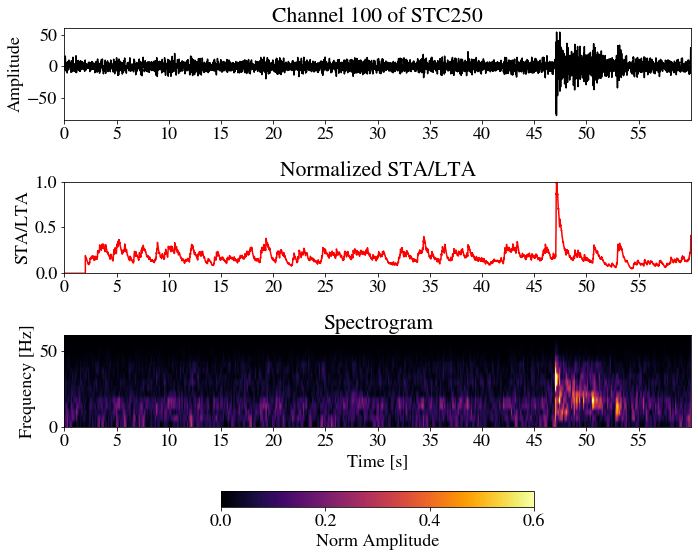

In [ ]:
# Input channel number
no_chann = 100
das = event.stc250

# Trace data
y = das.data[:,no_chann-1]
# y = normalize1D(y, method='MinMaxScaler')

ts = 0.001 # Sampling interval
t = das.tt

# CALCULATE STA/LTA
sl = STA_LTA(y)
sl = normalize1D(sl) # Normalize

# CALCULATE SPECTROGRAM
f, tt, Zxx = stftSpectrogram(y, fs=1/ts, plot=False)
Zxx = np.abs(Zxx)
Zxx = normalize(Zxx, method='MinMaxScaler') # Normalize

# PLOT
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,8), 
                       gridspec_kw={'height_ratios': [1,1,2]})

seis = ax[0].plot(t, y, color='black')

# # Plot event limits
# for i in range(ne-1):
#   if i<3:
#     # except event 5, because event 5 is connected to 4
#     t_lim = ((i+1)*nt)-1
#     ax[0].axvline(t[t_lim], ls='--', color='black')

ax[0].set_xlim(min(t), max(t))
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Channel {} of STC250'.format(no_chann))
ax[0].set_xticks(np.arange(0, max(t), 5))

stlt = ax[1].plot(t, sl, color='red')

# # Plot event limits
# for i in range(ne-1):
#   if i<3:
#     # except event 5, because event 5 is connected to 4
#     t_lim = ((i+1)*nt)-1
#     ax[1].axvline(t[t_lim], ls='--', color='black')

ax[1].set_xlim(min(t), max(t))
ax[1].set_ylim(0,1)
ax[1].set_title('Normalized STA/LTA')
ax[1].set_ylabel('STA/LTA')
ax[1].set_xticks(np.arange(0, max(t), 5))

stft = ax[2].imshow(Zxx, aspect='auto', extent=(min(t), max(t), min(f), max(f)), 
                    cmap='inferno', origin='lower', vmax=.6)
ax[2].set_ylim(0,60)
ax[2].set_title('Spectrogram')
ax[2].set_xlabel('Time [s]')
ax[2].set_ylabel('Frequency [Hz]')
plt.colorbar(stft, ax=ax[2], orientation='horizontal', pad=0.35, shrink=0.5, 
             label='Norm Amplitude')
ax[2].set_xticks(np.arange(0, max(t), 5))
 
plt.tight_layout(1.01)
plt.show()

Based on STA/LTA and STFT display above, for record 3, event is likely between 45 and 48 s. STA/LTA and STFT both take short time to compute, compared to AIC and Kurtosis. Now, we compare those methods in terms of computing time and result. 

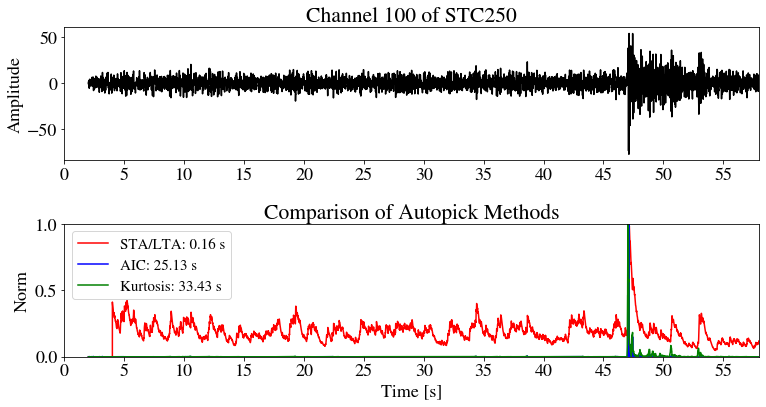

In [ ]:
import time

# Input channel number
no_chann = 100
das = event.stc250

# Time samples
ts = 0.001 # Sampling interval
t = das.tt

# Trace data
y = das.data[:,no_chann-1]
t, y = cutData1D(t, y, cut_trace=(2, 58)) # Cut if anomaly happens at start/end of trace
# y = normalize1D(y, method='MinMaxScaler')

# CALCULATE STA/LTA
tic = time.perf_counter()
sl = STA_LTA(y)
sl = normalize1D(sl) # Normalize
toc = time.perf_counter()
compute_time_sl = toc - tic

# CALCULATE AIC
tic = time.perf_counter()
aic = AIC(y)
aic = normalize1D(aic) # Normalize
toc = time.perf_counter()
compute_time_aic = toc - tic

# CALCULATE KURTOSIS
tic = time.perf_counter()
kurt = kurtosis(y)
kurt = normalize1D(kurt) # Normalize
toc = time.perf_counter()
compute_time_kurt = toc - tic

# PLOT
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(11,6))

seis = ax[0].plot(t, y, color='black')

ax[0].set_xlim(min(t), max(t))
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Channel {} of STC250'.format(no_chann))
ax[0].set_xticks(np.arange(0, max(t), 5))

ax[1].plot(t, sl, color='red', label='STA/LTA: {:.2f} s'.format(compute_time_sl))
ax[1].plot(t, aic, color='blue', label='AIC: {:.2f} s'.format(compute_time_aic))
ax[1].plot(t, kurt, color='green', label='Kurtosis: {:.2f} s'.format(compute_time_kurt))

ax[1].set_xlim(min(t), max(t))
ax[1].set_ylim(0,1)
ax[1].set_title('Comparison of Autopick Methods')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Norm')
ax[1].set_xticks(np.arange(0, max(t), 5))
ax[1].legend(fontsize=15)

fig.tight_layout()
fig.show()

## First break picking

We have obtained likely window between 45 and 48 s for the arrival. Because AIC and Kurtosis runs very slowly for a whole 1-minute trace, we cut the 2D data over that window, then run AIC and Kurtosis. Compare both results. 

In [ ]:
das = event.bc880

t = das.tt
data = das.data
nt, nz = data.shape

# Cut over specified window
tcut, data_cut = cutData2D(t, data, cut_trace=(13.8,15))

data, sl, kurt, aic = [], [], [], []
for i in range(nz):
  tr = data_cut[:,i]
  data.append(tr)

  # STA/LTA
  sl_ = STA_LTA(tr)
  sl.append(sl_)

  # Kurtosis
  kurt_ = kurtosis(tr)
  kurt.append(kurt_)

  # AIC
  aic_ = AIC(tr)
  aic.append(aic_)

  if i%10==0:
    print('Finished channel {}'.format(i+1))

Finished channel 1
Finished channel 11
Finished channel 21
Finished channel 31
Finished channel 41
Finished channel 51
Finished channel 61
Finished channel 71
Finished channel 81
Finished channel 91
Finished channel 101
Finished channel 111
Finished channel 121
Finished channel 131
Finished channel 141
Finished channel 151
Finished channel 161
Finished channel 171
Finished channel 181
Finished channel 191
Finished channel 201
Finished channel 211
Finished channel 221
Finished channel 231
Finished channel 241
Finished channel 251
Finished channel 261
Finished channel 271
Finished channel 281
Finished channel 291
Finished channel 301
Finished channel 311
Finished channel 321
Finished channel 331
Finished channel 341
Finished channel 351
Finished channel 361
Finished channel 371
Finished channel 381
Finished channel 391
Finished channel 401
Finished channel 411
Finished channel 421
Finished channel 431
Finished channel 441
Finished channel 451
Finished channel 461
Finished channel 471
Fin

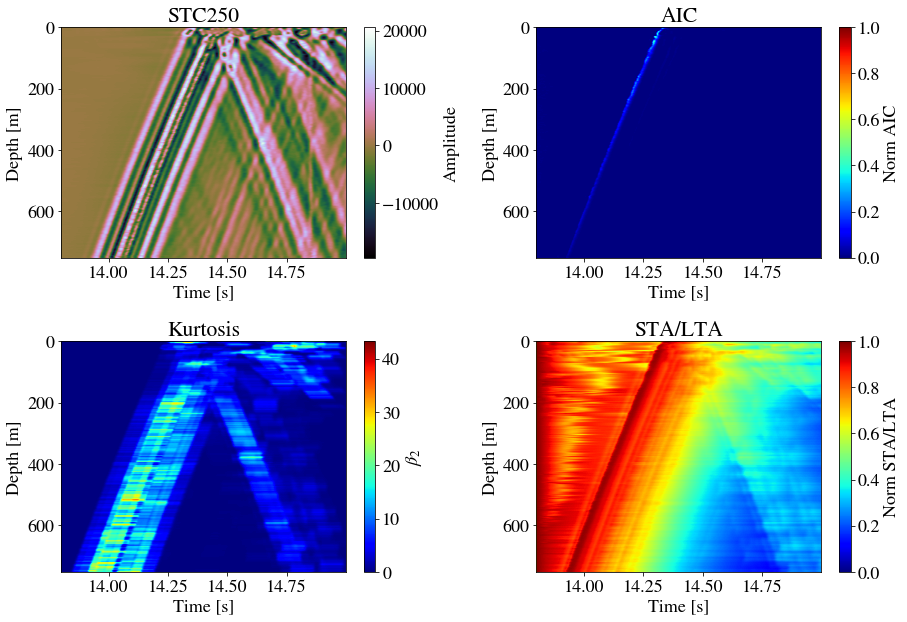

In [ ]:
x, y = tcut, das.zz  

# Plot original data
plt.figure(figsize=(13,9))
plt.subplot(2,2,1)
plotWaterfall(tcut, das.zz, data, title='STC250', xlabel='Time [s]', 
              ylabel='Depth [m]', clabel='Amplitude',
              cmap='cubehelix')

# Plot AIC result
plt.subplot(2,2,2)
aic = normalize(aic)
plotWaterfall(tcut, das.zz, aic, title='AIC', xlabel='Time [s]', 
              ylabel='Depth [m]', clabel='Norm AIC')

# Plot Kurtosis result
plt.subplot(2,2,3)
plotWaterfall(tcut, das.zz, kurt, title='Kurtosis', xlabel='Time [s]', 
              ylabel='Depth [m]', clabel=r'$\beta_2$')

# Plot STA/LTA result
plt.subplot(2,2,4)
sl = normalize(sl)
plotWaterfall(tcut, das.zz, sl, title='STA/LTA', xlabel='Time [s]', 
              ylabel='Depth [m]', clabel='Norm STA/LTA')

plt.tight_layout(1.1)

In [ ]:
def pick(t, data_tr, method='AIC', aic_threshold=0.8, kurt_window=100):
  """
  Execute autopicking

  INPUT:

  t: Time samples (1D array)
  data_tr: Trace data (1D array)
  method: Autopicking method options
    * AIC: Akaike Information Criterion (Default)
    * STA_LTA: Short-Time Average/Long-Term Average
    * kurtosis: Kurtosis 
  aic_threshold: Threshold at which event will be picked. From 0 to 1. 
    Specify only if the chosen method is 'AIC'
  kurt_window: Sliding window for kurtosis calculation. 
    Specify only if the chosen method is 'kurtosis'

  OUTPUT:

  id: Index of data where event is picked
  tp: Arrival time 
  """
  if method=='AIC':
    aic = normalize1D(AIC(data_tr))
    id = np.where(aic>=aic_threshold)[0]
    if not id.any():
      # No arrival is found with the given threshold
      id, tp = np.nan, np.nan
    else:
      id = id[0] 
      tp = tcut[id] # First value

  if method=='kurtosis':
    kurt = normalize1D(kurtosis(data_tr, kurt_window))
    id = np.where(kurt==1)[0]
    if not id.any():
      # No arrival is found with the given threshold
      id, tp = np.nan, np.nan
    else:
      id = id[0] 
      tp = tcut[id] # First value

  return id, tp

In [ ]:
das = event.bc880

t = das.tt
data = das.data
nt, nz = data.shape

# Cut over specified window
tcut, data_cut = cutData2D(t, data, cut_trace=(13.8,15))

tp, Ap = [], []
for i in range(nz):
  tr = data_cut[:,i]

  # AIC autopicking
  id, t = pick(tcut, tr, method='AIC', aic_threshold=1)
  if i%10==0:
    print('Finished channel {}'.format(i+1))
  
  # Record arrival times
  tp.append(t)

  # Record amplitude at arrival times
  a = tr[id]
  Ap.append(a)

# Save results to CSV
df = pd.DataFrame({'D': das.zz, 'tp': tp, 'Ap': Ap})
df.to_csv('P_BC880_file1.csv', index=False)

Finished channel 1
Finished channel 11
Finished channel 21
Finished channel 31
Finished channel 41
Finished channel 51
Finished channel 61
Finished channel 71
Finished channel 81
Finished channel 91
Finished channel 101
Finished channel 111
Finished channel 121
Finished channel 131
Finished channel 141
Finished channel 151
Finished channel 161
Finished channel 171
Finished channel 181
Finished channel 191
Finished channel 201
Finished channel 211
Finished channel 221
Finished channel 231
Finished channel 241
Finished channel 251
Finished channel 261
Finished channel 271
Finished channel 281
Finished channel 291
Finished channel 301
Finished channel 311
Finished channel 321
Finished channel 331
Finished channel 341
Finished channel 351
Finished channel 361
Finished channel 371
Finished channel 381
Finished channel 391
Finished channel 401
Finished channel 411
Finished channel 421
Finished channel 431
Finished channel 441
Finished channel 451
Finished channel 461
Finished channel 471
Fin

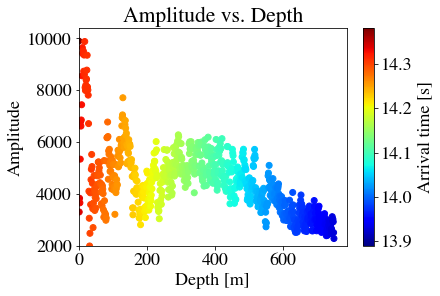

In [ ]:
# Scatter plot amplitude vs. depth
plt.scatter(das.zz, np.abs(Ap), c=tp, cmap='jet')
h = plt.colorbar()
h.set_label('Arrival time [s]')
# plt.yscale('log')
plt.title('Amplitude vs. Depth')
plt.xlabel('Depth [m]')
plt.ylabel('Amplitude')
plt.xlim(xmin=0)
plt.ylim(ymin=2e3)
# plt.grid()
plt.show()

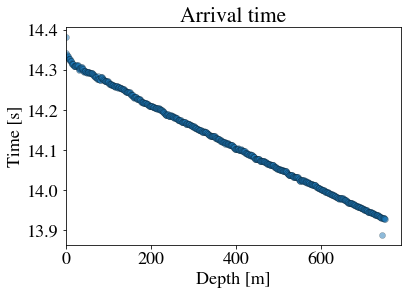

In [ ]:
plt.scatter(das.zz, tp, alpha=0.5, edgecolor='black', lw=0.3)
plt.title('Arrival time')
plt.xlabel('Depth [m]')
plt.ylabel('Time [s]')
plt.xlim(xmin=min(das.zz))
# plt.grid()
plt.show()

In [ ]:
# from scipy.optimize import curve_fit

# x=np.array([16.71, 17.35, 18.83, 19.89, 18.26, 16.54, 13.86]) # Epi-distance
# y=np.array([5.3, 5.5, 5.9, 6.1, 5.8, 5.2, 4.3]) # delta time

# # linear = lambda x, a, b: a*x+b
# linear = lambda x, a: a*x
# # [a,b], popt = curve_fit(linear, x, y)
# a, popt = curve_fit(linear, x, y)
# xfit = np.sort(x)
# yfit = linear(xfit,a)

# plt.scatter(x, y, color='blue', alpha=0.7)
# # plt.plot(xfit, yfit, color='red', label='y={:.2f}x+0'.format(a))
# plt.plot(xfit, yfit, color='red', label='y={:.2f}x'.format(a[0]))
# plt.title('Travel-time Plot')
# plt.xlabel('Epicentral distance [km]')
# plt.ylabel('$t_{P}-t_{0}$ [sec]')
# plt.legend(fontsize=15, loc='lower right')
# plt.axis('equal')
# # plt.grid()
# plt.show()